In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import os
import matplotlib.pyplot as plt
import pickle
import scipy 
plt.rcParams.update({'font.size': 20})


In [2]:
with open("../WorkArea/GMI/results/hist_gmi_jan.pickle", "rb") as f:
    hist_gmi = pickle.load(f)
    hist_gmi1 = pickle.load(f)
    hist_gmi2 = pickle.load(f)
    hist_gmi3 = pickle.load(f)
    bins      = pickle.load(f)
    f.close()

In [3]:
with open("../WorkArea/GMI/results//hist_lpa_jan.pickle" , "rb") as f:
    hist_lpa = pickle.load(f)
    hist_lpa1 = pickle.load(f)
    hist_lpa2 = pickle.load(f)
    hist_lpa3 = pickle.load(f)
    bins      = pickle.load(f)
    f.close()

In [4]:
with open("../WorkArea/GMI/results//hist_lpa_pr1_jan.pickle" , "rb") as f:
    hist_lpa_pr1 = pickle.load(f)
    hist_lpa1_pr1 = pickle.load(f)
    hist_lpa2_pr1 = pickle.load(f)
    hist_lpa3_pr1 = pickle.load(f)
    bins          = pickle.load(f)
    f.close()

In [5]:
with open("../WorkArea/GMI/results//hist_esa_jan.pickle" , "rb") as f:
    hist_esa  = pickle.load(f)
    hist_esa1 = pickle.load(f)
    hist_esa2 = pickle.load(f)
    hist_esa3 = pickle.load(f)
    bins      = pickle.load(f)
    f.close()

In [6]:
with open("../WorkArea/GMI/results//hist_esa_pr1_jan.pickle" , "rb") as f:
    hist_esa_pr1  = pickle.load(f)
    hist_esa1_pr1 = pickle.load(f)
    hist_esa2_pr1 = pickle.load(f)
    hist_esa3_pr1 = pickle.load(f)
    bins          = pickle.load(f)
    f.close()

In [7]:
bin_center[35: 70]

NameError: name 'bin_center' is not defined

In [8]:
from scipy.spatial import distance

#print (distance.jensenshannon(hist_gmi[70:, 0], hist_lpa[70:, 0]))

np.sum(bin_center[:35] * hist_gmi[:35, 0] * 2)

NameError: name 'bin_center' is not defined

In [9]:
bin_center = (bins[1:] + bins[:-1])*0.5

In [10]:
def plot_pdfs(hist_gmi, hist_lpa, hist_lpa_pr1, hist_esa, hist_esa_pr1, bin_center, filename = "PDF_TB_jan.pdf" ):
    fig, ax = plt.subplots(2,2, figsize = [16, 16])
    ax = ax.ravel()
    titles = ["166V GHz", "166H GHz", r"183.31$\pm$3 GHz", r"183.31$\pm$7 GHz"]
    for i in range(4):
        ax[i].plot(bin_center, hist_gmi[:, i], '-k', label = "GMI", linewidth = 2.5)
        ax[i].plot(bin_center, hist_lpa[:, i], '--', label = "LPA-ARO", linewidth = 2.5)
        ax[i].plot(bin_center, hist_lpa_pr1[:, i], '--', label = "LPA-TRO", linewidth = 2.5)
        ax[i].plot(bin_center, hist_esa[:, i], '--', label = "ESA-ARO", linewidth = 2.5)
        ax[i].plot(bin_center, hist_esa_pr1[:, i], '-.' ,label = "ESA-TRO", linewidth = 2.5)
        ax[i].set_yscale("log")

        ax[0].legend()
        ax[i].set_title(titles[i])
        ax[i].grid('on', alpha = 0.2)

    ax[2].set_xlabel("TB [K]")
    ax[2].set_ylabel(r"PDF [#K$^{-1}$] ")   
    ax[3].set_xlabel("TB [K]")
    ax[0].set_ylabel(r"PDF [#K$^{-1}$] ")   
    fig.savefig(filename, bbox_inches = "tight")

In [11]:
def mean_TB(hist, bin_center):
    atb = np.zeros([4])
    for i in range(4):
        atb[i] = np.sum(bin_center[:69] * hist[:69, i] * 2)/np.sum(hist[:69, i] * 2)
    return atb

In [12]:
atb_gmi = mean_TB(hist_gmi, bin_center)
atb_lpa = mean_TB(hist_lpa, bin_center)

dtb = np.std(atb_gmi - atb_lpa)
dtb

0.36582573390326756

In [13]:
atb_lpa

array([213.53462367, 214.88799447, 223.65894874, 221.13904608])

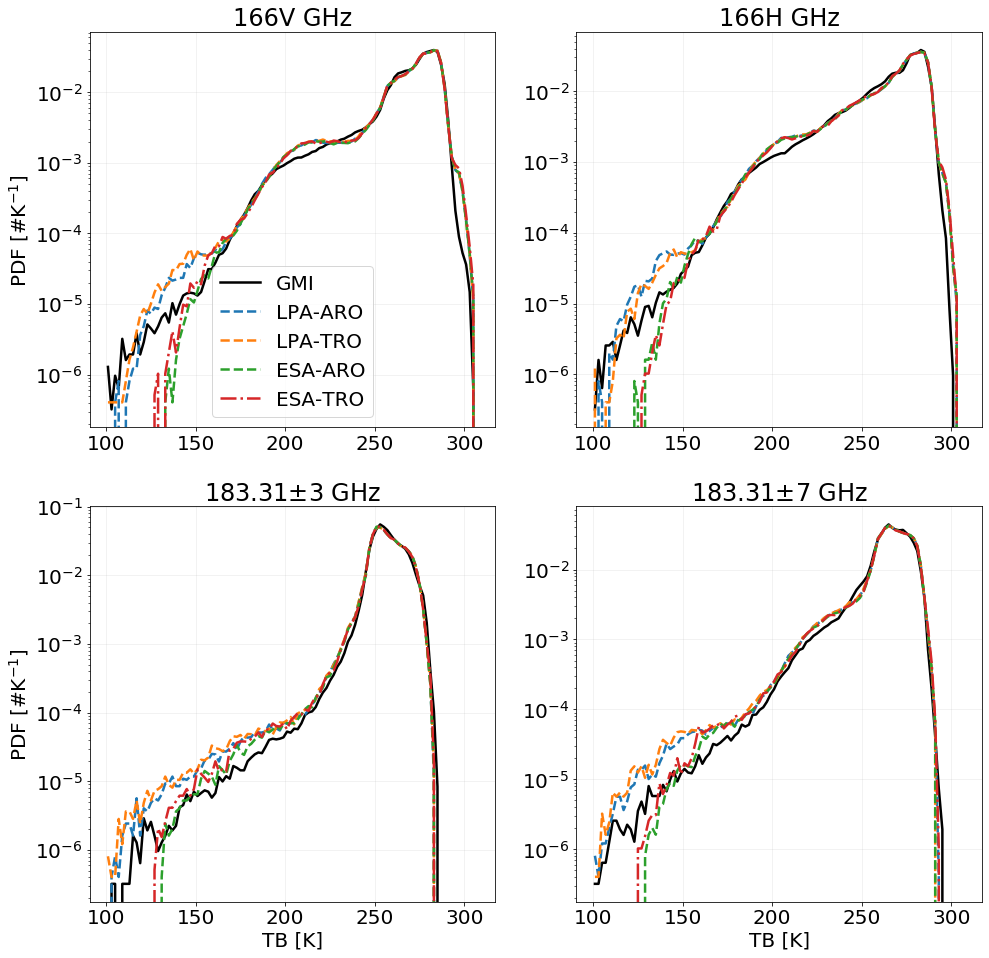

In [14]:
plot_pdfs(hist_gmi, hist_lpa, hist_lpa_pr1, hist_esa, hist_esa_pr1, bin_center, filename = "PDF_TB_jan.pdf" )

Text(0, 0.5, 'PDF [#K$^{-1}$] ')

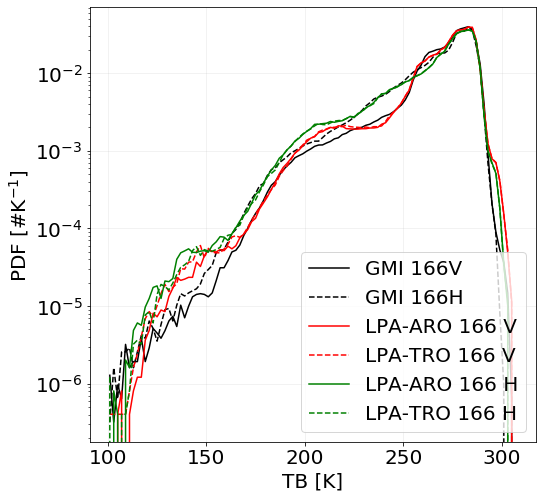

In [95]:
fig, ax = plt.subplots(1,1, figsize = [8, 8])

#titles = ["166V GHz", "166H GHz""]
ax.plot(bin_center, hist_gmi[:, 0], '-k', label = "GMI 166V")
ax.plot(bin_center, hist_gmi[:, 1], 'k--', label = "GMI 166H")


ax.plot(bin_center, hist_lpa[:, 0], 'r-', label = "LPA-ARO 166 V")
ax.plot(bin_center, hist_lpa_pr1[:, 0], 'r--', label = "LPA-TRO 166 V")

ax.plot(bin_center, hist_lpa[:, 1], 'g-', label = "LPA-ARO 166 H")
ax.plot(bin_center, hist_lpa_pr1[:, 1], 'g--', label = "LPA-TRO 166 H")
    #ax.plot(bin_center, hist_esa[:, i], '--', label = "ESA-ARO")
    #ax.plot(bin_center, hist_esa_pr1[:, i], '-.' ,label = "ESA-TRO")
ax.set_yscale("log")

ax.legend()
#ax.set_title(titles[i])
ax.grid('on', alpha = 0.2)

ax.set_xlabel("TB [K]")
ax.set_ylabel(r"PDF [#K$^{-1}$] ")   
ax.set_xlabel("TB [K]")
ax.set_ylabel(r"PDF [#K$^{-1}$] ")   
#fig.savefig(filename, bbox_inches = "tight")

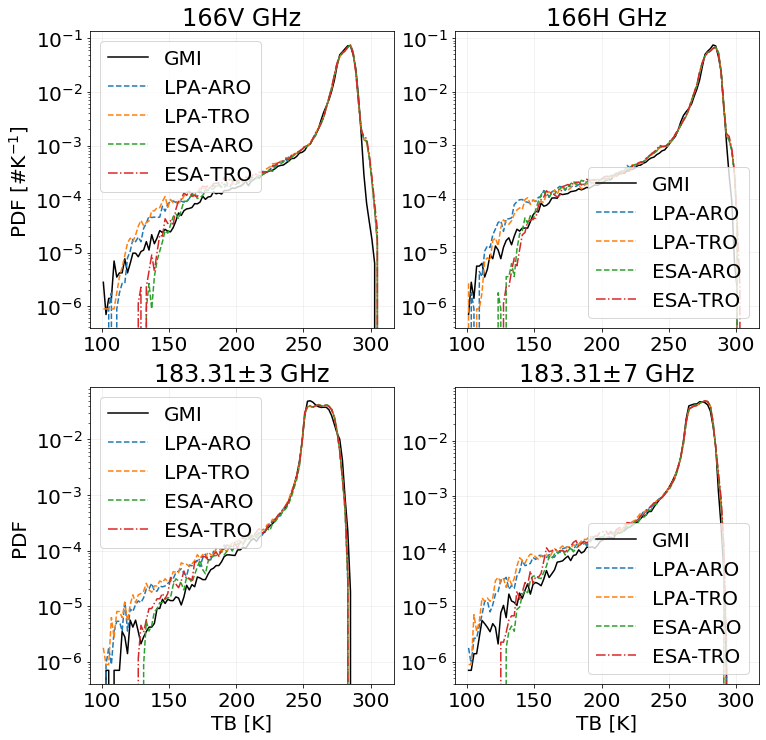

In [26]:
plot_pdfs(hist_gmi1, hist_lpa1, hist_lpa1_pr1, hist_esa1, hist_esa1_pr1, bin_center, filename = "PDF_TB_jan_tropics.pdf" )

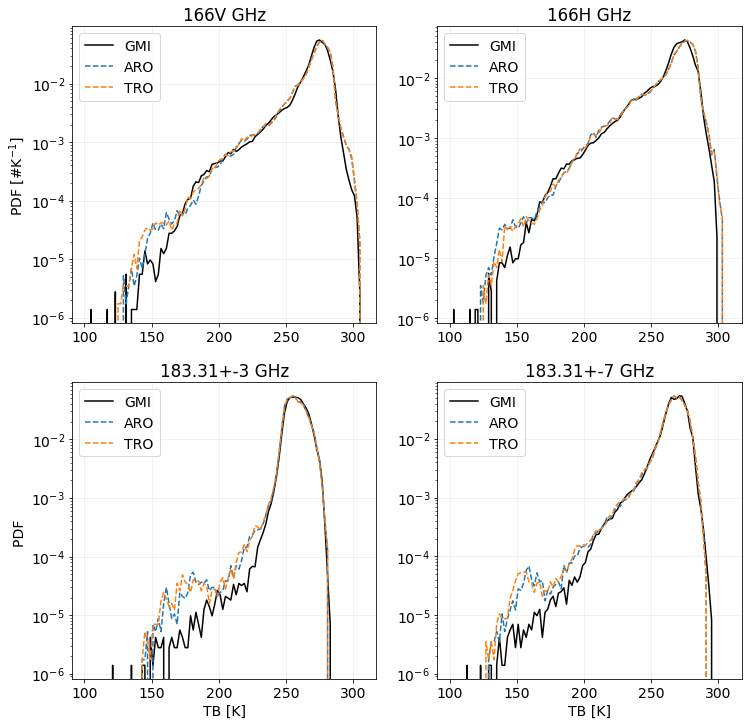

In [14]:
plot_pdfs(hist_gmi2, hist_lpa2, hist_lpa2_pr1, hist_esa2, hist_esa2_pr1, bin_center, filename = "PDF_TB_jan_mlat.pdf" )

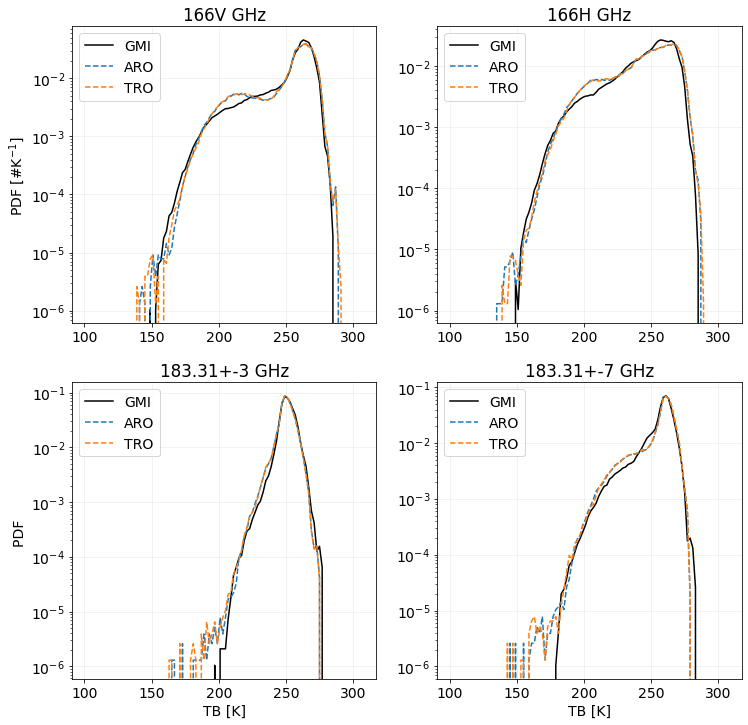

In [15]:
plot_pdfs(hist_gmi3, hist_lpa3, hist_lpa3_pr1, hist_esa3, hist_esa3_pr1, bin_center, filename = "PDF_TB_jan_hlat.pdf" )

In [16]:
with open("../WorkArea/GMI/results/hist_gmi_jun.pickle", "rb") as f:
    hist_gmi = pickle.load(f)
    bins     = pickle.load(f)
    f.close()

In [17]:
with open("../WorkArea/GMI/results/hist_lpa_jun.pickle" , "rb") as f:
    hist_lpa = pickle.load(f)
    bins     = pickle.load(f)
    f.close()

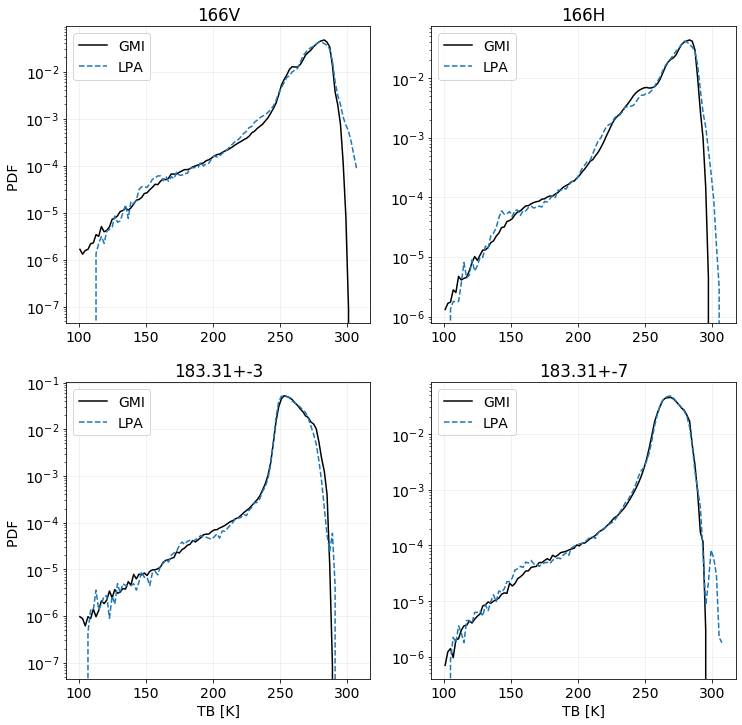

In [18]:
fig, ax = plt.subplots(2,2, figsize = [12, 12])
ax = ax.ravel()
titles = ["166V", "166H", "183.31+-3", "183.31+-7"]
for i in range(4):
    ax[i].plot(bin_center, hist_gmi[:, i], '-k', label = "GMI")
    ax[i].plot(bin_center, hist_lpa[:, i], '--', label = "LPA")
#    ax[i].plot(bin_center, hist_lpa_pr1[:, i], '--', label = "LPA_pr1")
#    ax[i].plot(bin_center, hist_esa[:, i], '--', label = "ESA")
#    ax[i].plot(bin_center, hist_esa_pr1[:, i], '-.' ,label = "ESA_pr1")
    ax[i].set_yscale("log")

    ax[i].legend()
    ax[i].set_title(titles[i])
    ax[i].grid('on', alpha = 0.2)
    
ax[2].set_xlabel("TB [K]")
ax[2].set_ylabel("PDF ")   
ax[3].set_xlabel("TB [K]")
ax[0].set_ylabel("PDF ")   
fig.savefig("PDF_TB_jun.pdf", bbox_inches = "tight")

In [19]:
with open("../WorkArea/GMI/PD_lpa.pickle", "rb") as f:
    hist_gmi = pickle.load(f)
    hist_lpa = pickle.load(f)
    bins     = pickle.load(f)
    f.close()

In [20]:
with open("../WorkArea/GMI/PD_lpa_pr1.pickle", "rb") as f:
    hist_gmi = pickle.load(f)
    hist_lpa_pr1 = pickle.load(f)
    bins     = pickle.load(f)
    f.close()

In [21]:
with open("../WorkArea/GMI/PD_esa.pickle", "rb") as f:
    hist_gmi = pickle.load(f)
    hist_esa = pickle.load(f)
    bins     = pickle.load(f)
    f.close()

In [22]:
with open("../WorkArea/GMI/PD_esa_pr1.pickle", "rb") as f:
    hist_gmi = pickle.load(f)
    hist_esa_pr1 = pickle.load(f)
    bins     = pickle.load(f)
    f.close()

Text(0, 0.5, 'PDF [K$^{-1}$]')

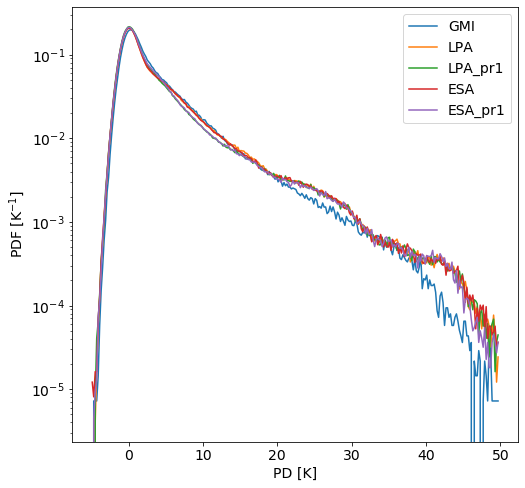

In [23]:
bin_centers = (bins[1:] + bins[:-1])/2
fig, ax = plt.subplots(1, 1, figsize = [8,8])
ax.plot(bin_centers, hist_gmi, label = "GMI")
ax.plot(bin_centers, hist_lpa, label = "LPA")
ax.plot(bin_centers, hist_lpa_pr1, label = "LPA_pr1")
ax.plot(bin_centers, hist_esa, label = "ESA")
ax.plot(bin_centers, hist_esa_pr1, label = "ESA_pr1")
ax.legend()
ax.set_yscale("log")
ax.set_xlabel("PD [K]")
ax.set_ylabel(r"PDF [K$^{-1}$]")


/home/inderpreet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/home/inderpreet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/home/inderpreet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
/home/inderpreet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/home/inderpreet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/home/inderpreet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/home/inderpreet/anaconda3/

Text(0, 0.5, 'PDF [K$^{-1}$]')

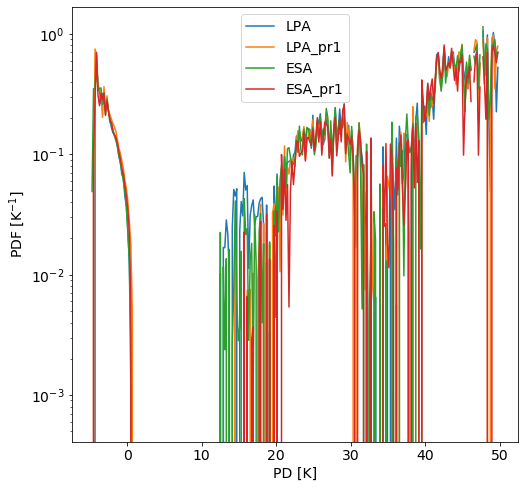

In [24]:
div_lpa = np.log10(hist_lpa/hist_gmi)
div_lpa_pr1 = np.log10(hist_lpa_pr1/hist_gmi)
div_esa = np.log10(hist_esa/hist_gmi)
div_esa_pr1 = np.log10(hist_esa_pr1/hist_gmi)


bin_centers = (bins[1:] + bins[:-1])/2
fig, ax = plt.subplots(1, 1, figsize = [8,8])
ax.plot(bin_centers, div_lpa, label = "LPA")
ax.plot(bin_centers, div_lpa_pr1, label = "LPA_pr1")
ax.plot(bin_centers, div_esa, label = "ESA")
ax.plot(bin_centers, div_esa_pr1, label = "ESA_pr1")
ax.legend()
ax.set_yscale("log")
ax.set_xlabel("PD [K]")
ax.set_ylabel(r"PDF [K$^{-1}$]")


In [25]:
from iwc2tb.GMI.GMI import GMI
import glob
import os
#inpath    =  os.path.expanduser('~/Dendrite/Projects/IWP/GMI/GMI_m65_p65/')  
inpath1   =  os.path.expanduser('~/Dendrite/Projects/IWP/GMI/GMI_m65_p65_v1.1/lpa_pr_1') 
matfiles1 = glob.glob(os.path.join(inpath1, "2009_*.mat"))

#matfiles += matfiles1

lpa_pr1       = GMI(matfiles1[:])

In [26]:
arofiles = []
basenames = []
aropath = os.path.expanduser('~/Dendrite/Projects/IWP/GMI/GMI_m65_p65_v1.1/') 
for file in matfiles1:
        
    basename = os.path.basename(file)
    file = os.path.join(aropath, basename)

    arofiles.append(file)
    basenames.append(basename)
    
lpa = GMI(arofiles[:])  

In [27]:
pr    = lpa.pratio
stype = lpa.stype
iwp   = lpa.iwp

(3666, 1)
(3666, 1)
(3712, 1)
(3666, 1)
(3666, 1)
(3712, 1)
(7342, 1)
(3712, 1)
(3666, 1)
(7342, 1)
(7342, 1)
(3666, 1)
(3665, 1)
(3711, 1)
(3666, 1)
(3666, 1)
(7342, 1)
(7342, 1)
(7342, 1)
(3711, 1)
(3712, 1)
(7342, 1)
(7341, 1)
(7341, 1)
(7341, 1)
(3711, 1)
(3712, 1)
(3666, 1)
(3666, 1)
(3665, 1)
(7342, 1)
(3712, 1)
(3711, 1)
(3712, 1)
(3666, 1)
(7342, 1)
(3711, 1)
(7342, 1)
(3712, 1)
(3712, 1)
(3666, 1)
(7342, 1)
(3711, 1)
(7342, 1)
(7341, 1)
(7342, 1)
(3712, 1)
(3666, 1)
(3666, 1)
(3712, 1)
(7341, 1)
(3666, 1)
(3712, 1)
(7342, 1)
(3712, 1)
(7342, 1)
(3712, 1)
(3711, 1)
(7341, 1)
(7342, 1)
(7342, 1)
(7342, 1)
(7342, 1)
(3711, 1)
(3666, 1)
(3712, 1)
(3666, 1)
(3666, 1)
(3712, 1)
(3712, 1)
(3711, 1)
(3711, 1)
(3666, 1)
(3665, 1)
(7342, 1)
(3712, 1)
(3712, 1)
(3665, 1)
(3712, 1)
(7342, 1)
(3666, 1)
(7342, 1)
(7341, 1)
(7342, 1)
(7341, 1)
(3711, 1)
(7342, 1)
(7342, 1)
(3712, 1)
(3666, 1)
(3711, 1)
(3712, 1)
(3665, 1)
(7341, 1)
(3666, 1)
(7341, 1)
(3665, 1)
(3666, 1)
(7342, 1)
(3666, 1)


In [28]:
ta = lpa.ta_noise


In [29]:
ta_csky = lpa.ta_csky_noise

In [30]:
ta_pr1 = lpa_pr1.ta_noise

In [148]:
mask = (stype == 0)  

In [149]:
iwpmask = (iwp > 0.0001)
iwpmask = np.logical_and(iwpmask, mask)
np.sum(iwpmask)

404714

In [150]:

np.sum(mask)

886252

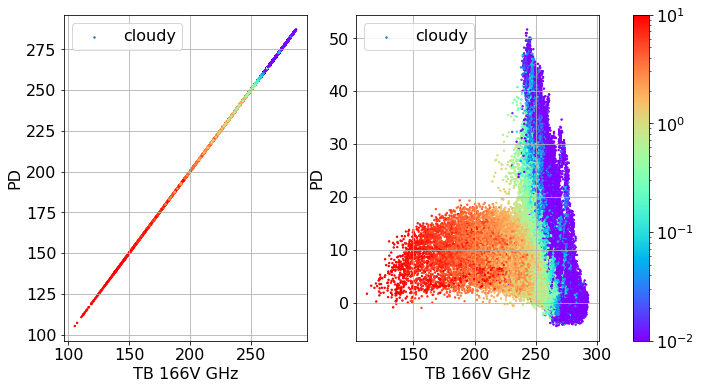

In [153]:
from matplotlib import cm
import matplotlib.colors as colors

plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(1, 2, figsize = [12,6])
ax = ax.ravel()
#ax.scatter(ta_pr1[mask, 0], ta_pr1[mask, 0] - ta_pr1[mask, 1], alpha = 0.1)

#ax.scatter(ta[mask, 0], ta[mask,0] - ta[mask, 1], alpha = 0.1, s = 2, label = "ARO")
#ax.scatter(ta_pr1[mask, 0], ta_pr1[mask,0] - ta_pr1[mask, 1], alpha = 0.1, label = "TRO")

cs = ax[0].scatter(ta_pr1[iwpmask, 2], ta_pr1[iwpmask, 2] , 
           c = iwp[iwpmask], norm=colors.LogNorm(vmin=0.01, vmax= 10), s = 2,
                cmap = cm.rainbow,  label = "cloudy")

cs = ax[1].scatter(ta[iwpmask, 0] , ta[iwpmask,0] - ta[iwpmask, 1], 
           c = iwp[iwpmask], norm=colors.LogNorm(vmin=0.01, vmax= 10), s = 2,
                cmap = cm.rainbow,  label = "cloudy")

#ax.scatter(ta_csky[mask, 0], ta_csky[mask, 0] - ta_csky[mask, 1], s = 2, c = "k", alpha = 0.1, label = "clearsky")

fig.colorbar(cs, ax = ax)

#x = np.arange(100, 300, 1)
#y = x
#ax.plot(x, y, "k")
for i in range(2):
    ax[i].set_xlabel("TB 166V GHz")
    ax[i].set_ylabel("PD")
    ax[i].grid("on")
    ax[i].legend()
    #ax[i].set_xlim([100, 300])
    #ax[i].set_ylim([-5, 30])
fig.savefig("pd_water.png", bbox_inches = "tight")

In [72]:
import xarray
import os

infile = os.path.expanduser("~/Dendrite/Projects/IWP/GMI/training_data/TB_GMI_train_jul_2010.nc")
infile = os.path.expanduser("~/Dendrite/Projects/IWP/GMI/training_data/TB_GMI_train_jan_lpa.nc")

In [73]:
dataset = xarray.open_dataset(infile)

In [74]:
dataset.ta

<xarray.DataArray 'ta' (cases: 988993, channels: 4)>
[3955972 values with dtype=float64]
Coordinates:
  * cases     (cases) int64 268782 1230445 768923 980542 ... 68054 575604 737333
  * channels  (channels) object '166.5V' '166.5H' '183+-3' '183+-7'
Attributes:
    stype:    [1 0 0 ... 0 0 0]
    lon:      [132.93557269  22.88081438  -7.53604233 ... 202.8811288   87.64...
    lat:      [ -3.10651702 -37.88464608  -1.35197137 ...  32.45915776 -25.70...
    iwp:      [0.00000000e+00 3.36107496e-06 0.00000000e+00 ... 2.98494215e-0...
    wvp:      [55.00927981 28.5352213  51.9310095  ... 30.70034589 21.4935476...
    rwp:      [0.00000000e+00 3.01397497e-03 2.01749114e-04 ... 5.89820017e-0...
    t0:       [297.41764339 292.39766577 299.35644039 ... 289.84878137 294.49...
    p0:       [100447.69765145 101003.80820885 100948.31328065 ... 101224.065...
    z0:       [ 4.69041696e+01 -1.95138836e-10  5.36800601e-11 ...  1.6494168...
    t2m:      [297.31404444 293.32552543 299.78538977 ... 291.05671648 295.90...
    skt:      [296.85238969 294.48256044 301.15020957 ... 290.9428956  297.04...
    pratio:   [1.35924586 1.02098003 1.04552689 ... 1.25866601 1.15399125 1.1...

In [75]:
tb = dataset.ta.data



In [78]:
iwp = dataset.ta.iwp
lat = dataset.ta.lat
stype = dataset.ta.stype
mask = (lat > 45) & (iwp > 0.1) & (stype == 2) 
mask1 = (lat > 45) & (iwp < 0.1) & (stype == 2) 

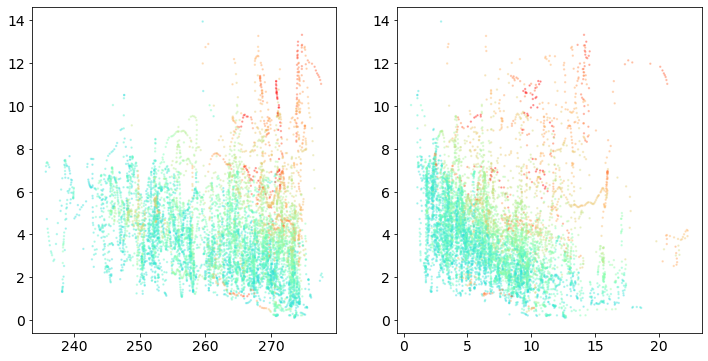

In [106]:
fig, ax = plt.subplots(1, 2, figsize = [12, 6])
ax = ax.ravel()
ax[0].scatter(dataset.ta.t2m[mask], (dataset.ta[:, 0] - dataset.ta[:, 1])[mask], 
              c = iwp[mask], alpha = 0.3, norm=colors.LogNorm(vmin=0.01, vmax= 10), s = 2, 
                cmap = cm.rainbow)
#ax[0].set_xscale("log")

ax[1].scatter(dataset.ta.wvp[mask], (dataset.ta[:, 0] - dataset.ta[:, 1])[mask], 
              c = iwp[mask], alpha = 0.3, norm=colors.LogNorm(vmin=0.01, vmax= 10), s = 2, 
                cmap = cm.rainbow)

#for i in range(2):
#    ax[i].set_xlim([220, 280])
#    ax[i].set_ylim([160, 280])
#ax[1].set_xscale("log")

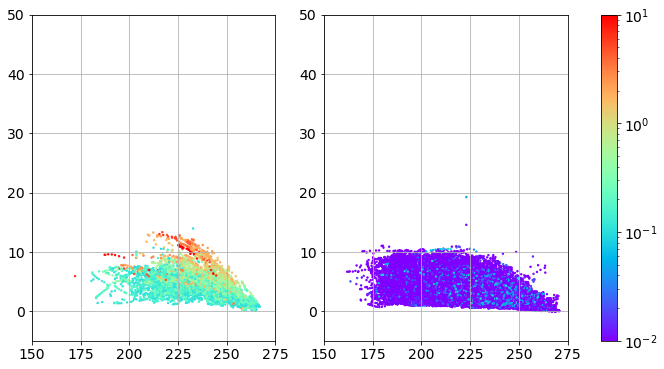

In [79]:
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as colors
fig, ax = plt.subplots(1, 2, figsize = [12, 6])
ax = ax.ravel()
cs = ax[0].scatter(tb[:, 0][mask], tb[:, 0][mask] - tb[:, 1][mask], c = iwp[mask], 
           norm=colors.LogNorm(vmin=0.01, vmax= 10), s = 2, 
                cmap = cm.rainbow)

cs = ax[1].scatter(tb[:, 0][mask1], tb[:, 0][mask1] - tb[:, 1][mask1], c = iwp[mask1], 
           norm=colors.LogNorm(vmin=0.01, vmax= 10), s = 2, 
                cmap = cm.rainbow)

fig.colorbar(cs, ax = ax)

for i in range(2):
    ax[i].set_xlim([150, 275])
    ax[i].set_ylim([-5, 50])
    ax[i].grid('on')

/home/inderpreet/git/Projects/IWC2TB/iwc2tb/common/plot_locations_map.py:35: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  resolution='c',projection='cyl')


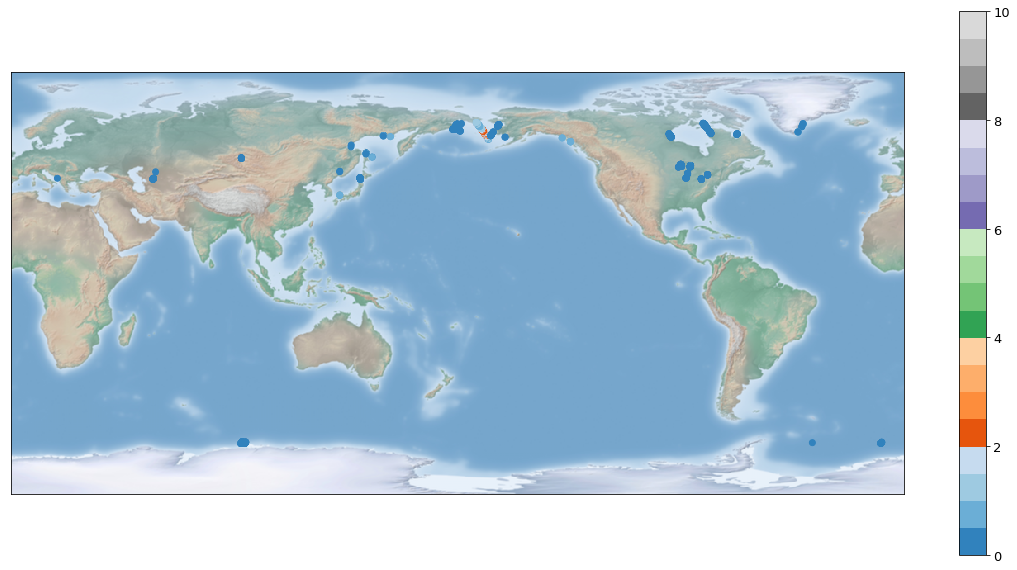

In [40]:
from iwc2tb.common.plot_locations_map import plot_locations_map

lat = lpa.lat
lon = lpa.lon

plot_locations_map(lat[iwpmask], lon[iwpmask], iwp[iwpmask])